In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import co2calc

In [3]:
T = 20.
S = 34.7

DIC, ALK = np.meshgrid(
    np.linspace(2000., 2300., 100), 
    np.linspace(2300., 2460., 100), 
)

<a list of 34 text.Text objects>

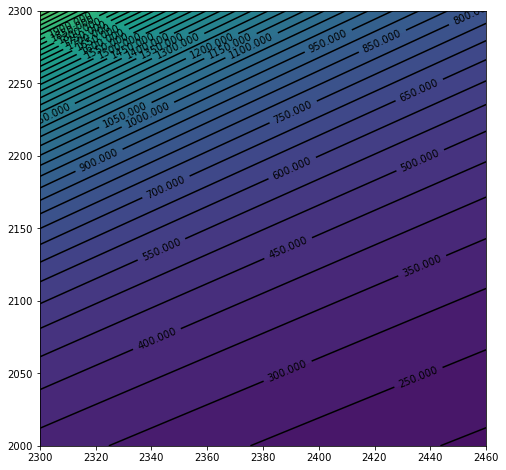

In [4]:
pCO2 = np.empty(DIC.shape)
for i in range(DIC.shape[0]):
    for j in range(DIC.shape[1]):
        pCO2[i, j] = co2calc.co2sys(S, T, DIC=DIC[i, j], ALK=ALK[i, j]).pCO2
        

levels = np.arange(50, 3000, 50)

plt.figure(figsize=(8, 8))
plt.contourf(ALK, DIC, pCO2, 
             levels=levels
            )
cl = plt.contour(ALK, DIC, pCO2, 
                 levels=levels,
                 colors='k',
                )
            
plt.clabel(cl, cl.levels, inline=True, fontsize=10)           

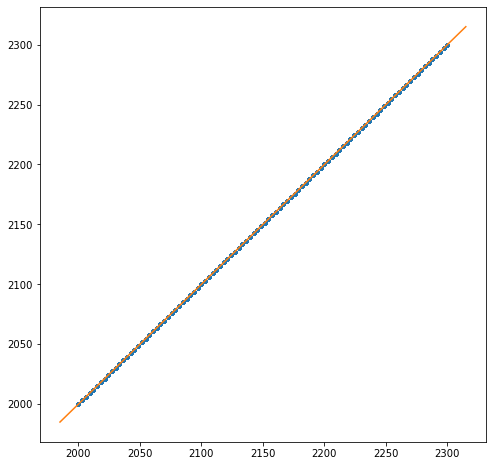

In [5]:
DIC_check = np.empty(pCO2.shape)
for i in range(pCO2.shape[0]):
    for j in range(pCO2.shape[1]):
        DIC_check[i, j] = co2calc.co2sys(S, T, pCO2=pCO2[i, j], ALK=ALK[i, j]).DIC
        
plt.figure(figsize=(8, 8))
plt.plot(DIC.ravel(), DIC_check.ravel(), '.')
plt.plot(plt.xlim(), plt.xlim(), '-')